In [128]:
import sklearn as skl
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing  
from sklearn.tree import DecisionTreeRegressor
import sklearn
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
#from sklearn.cross_validation import train_test_split

# Data Exploration

In [129]:
# read csv file
df = pd.read_csv('../datasets/properties_data.csv')


In [130]:
# see first 5 lines
df.head()

,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,...,False,False,True,False,False,False,False,False,True,False
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,...,False,False,True,True,False,False,False,False,True,False
2,6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,...,False,True,True,True,False,False,False,True,True,True
3,6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,...,False,False,False,False,False,False,False,False,False,False
4,6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,...,False,True,True,True,True,False,False,True,True,False


In [131]:
# See lines and columns (lines,columns)
df.shape


(1905, 38)

In [132]:
# See types of each attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1905 non-null   int64  
 1   neighborhood         1905 non-null   object 
 2   latitude             1905 non-null   float64
 3   longitude            1905 non-null   float64
 4   price                1905 non-null   int64  
 5   size_in_sqft         1905 non-null   int64  
 6   price_per_sqft       1905 non-null   float64
 7   no_of_bedrooms       1905 non-null   int64  
 8   no_of_bathrooms      1905 non-null   int64  
 9   quality              1905 non-null   object 
 10  maid_room            1905 non-null   bool   
 11  unfurnished          1905 non-null   bool   
 12  balcony              1905 non-null   bool   
 13  barbecue_area        1905 non-null   bool   
 14  built_in_wardrobes   1905 non-null   bool   
 15  central_ac           1905 non-null   b

In [133]:
# See number of different values of each attribute
df.nunique()

id                     1905
neighborhood             54
latitude                723
longitude               722
price                   821
size_in_sqft           1121
price_per_sqft         1784
no_of_bedrooms            6
no_of_bathrooms           6
quality                   4
maid_room                 2
unfurnished               2
balcony                   2
barbecue_area             2
built_in_wardrobes        2
central_ac                2
childrens_play_area       2
childrens_pool            2
concierge                 2
covered_parking           2
kitchen_appliances        2
lobby_in_building         2
maid_service              2
networked                 2
pets_allowed              2
private_garden            2
private_gym               2
private_jacuzzi           2
private_pool              2
security                  2
shared_gym                2
shared_pool               2
shared_spa                2
study                     2
vastu_compliant           2
view_of_landmark    

In [134]:
# See Stats of attribute Price 
df['price'].describe()

count    1.905000e+03
mean     2.085830e+06
std      2.913200e+06
min      2.200000e+05
25%      8.900000e+05
50%      1.400000e+06
75%      2.200000e+06
max      3.500000e+07
Name: price, dtype: float64

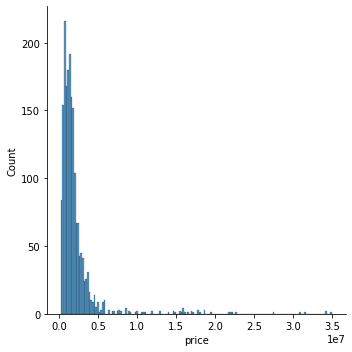

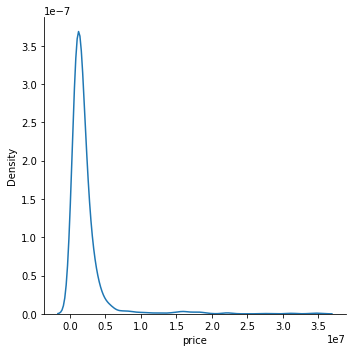

In [135]:
# See how prices are distributed
sns.displot(df,x="price")
sns.displot(df,x="price",kind="kde")

In [136]:
# See if have missing values or duplicated data
print(df.isna().sum())
print(df.duplicated().sum())

id                     0
neighborhood           0
latitude               0
longitude              0
price                  0
size_in_sqft           0
price_per_sqft         0
no_of_bedrooms         0
no_of_bathrooms        0
quality                0
maid_room              0
unfurnished            0
balcony                0
barbecue_area          0
built_in_wardrobes     0
central_ac             0
childrens_play_area    0
childrens_pool         0
concierge              0
covered_parking        0
kitchen_appliances     0
lobby_in_building      0
maid_service           0
networked              0
pets_allowed           0
private_garden         0
private_gym            0
private_jacuzzi        0
private_pool           0
security               0
shared_gym             0
shared_pool            0
shared_spa             0
study                  0
vastu_compliant        0
view_of_landmark       0
view_of_water          0
walk_in_closet         0
dtype: int64
0


In [138]:

_ , ax = plt.subplot(figsize=(15,6))
sns.boxplot(x=df["price"],y=df["neighborhood"])

AttributeError: AxesSubplot.set() got an unexpected keyword argument 'figsize'

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

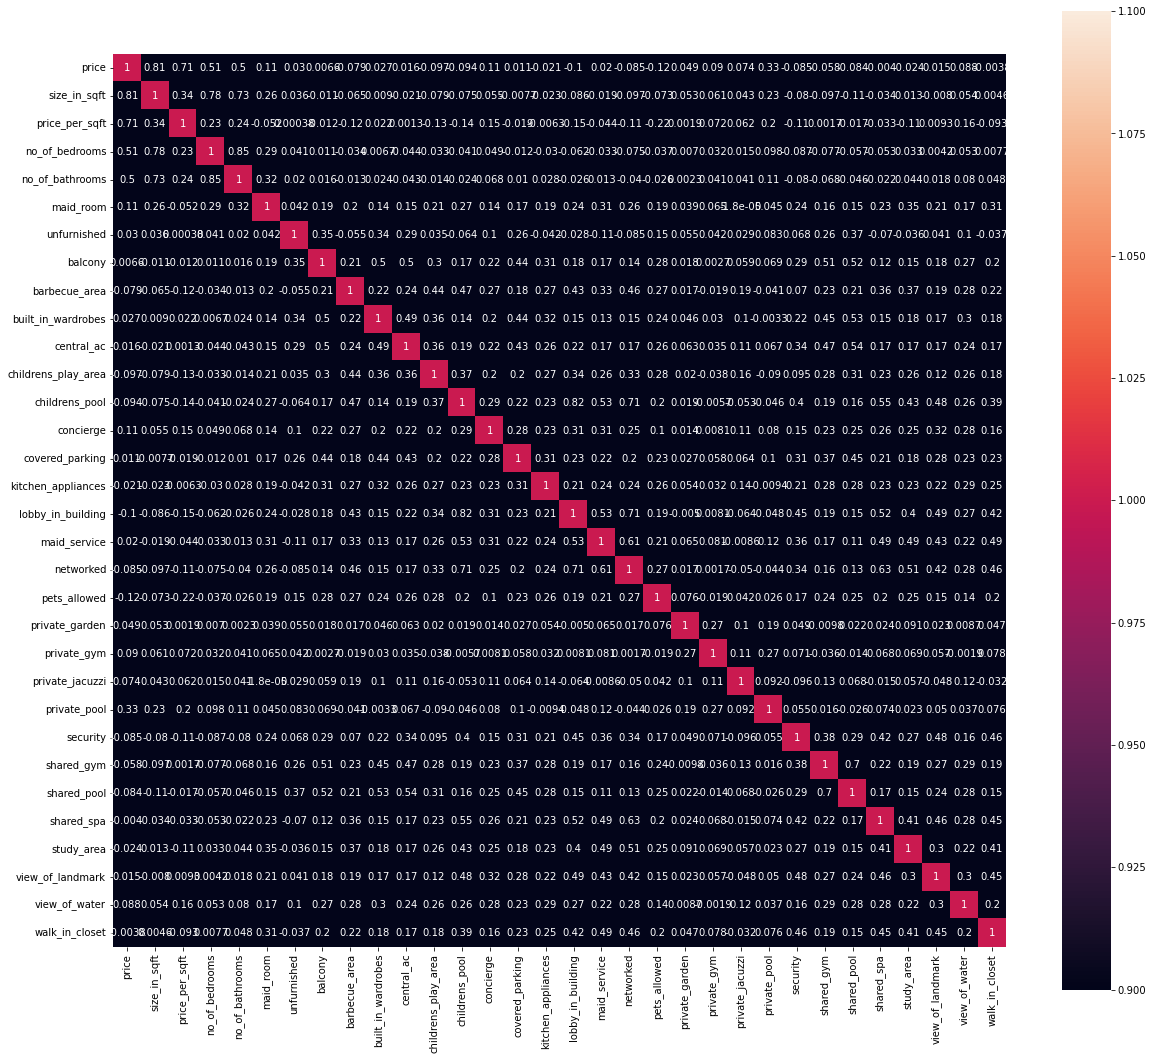

In [ ]:
# correlation of data
corr_matrix = df.corr()
f,ax = plt.subplots(figsize=(20,18))
sns.heatmap(corr_matrix,vmin=1,vmax=1,square=True,annot=True)


# Data preparation

In [ ]:
# rename columns
df.rename(columns={"study":"study_area"}, inplace=True)

# drop columns
df.drop(['id','neighborhood','quality','vastu_compliant'], axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   latitude             1905 non-null   float64
 1   longitude            1905 non-null   float64
 2   price                1905 non-null   int64  
 3   size_in_sqft         1905 non-null   int64  
 4   price_per_sqft       1905 non-null   float64
 5   no_of_bedrooms       1905 non-null   int64  
 6   no_of_bathrooms      1905 non-null   int64  
 7   maid_room            1905 non-null   bool   
 8   unfurnished          1905 non-null   bool   
 9   balcony              1905 non-null   bool   
 10  barbecue_area        1905 non-null   bool   
 11  built_in_wardrobes   1905 non-null   bool   
 12  central_ac           1905 non-null   bool   
 13  childrens_play_area  1905 non-null   bool   
 14  childrens_pool       1905 non-null   bool   
 15  concierge            1905 non-null   b

# Create model

In [140]:
#y são os valores dos imoveis que queremos prever no price
y = df.price
#OU y=df['price'].to_frame()


In [141]:
#x=df['neighborhood','size_in_sqft','price_per_sqft','no_of_bedrooms',
#'no_of_bathrooms','maid_room','unfurnished','balcony','barbecue_area',
#'built_in_wardrobes','central_ac','childrens_play_area','childrens_pool',
#'concierge','covered_parking','kitchen_appliances','lobby_in_building',
#'maid_service','networked','pets_allowed','private_garden','private_gym',
#'private_jacuzzi','private_pool','security','shared_gym','shared_pool',
#'shared_spa','study_area','view_of_landmark','view_of_water','walk_in_closet']

#OU
x=df.drop(['price'],axis=1)

In [142]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=1)

In [143]:
# especificar o random_state para garantir os mesmos resultados a cada execução
df_model = DecisionTreeRegressor(random_state=1)

In [144]:
#df_model.fit(x, y)
df_model.fit(x_train, y_train)
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

ValueError: could not convert string to float: 'Business Bay'

In [ ]:
#sklearn decision trees não conseguem lidar com dados categóricos
#considerar latitude e longitude em vez de neighborhood

In [145]:
#para ver como funciona
print(x_test.head())
printf(df_model.predict(x_test.head(10)))

           id              neighborhood   latitude  longitude  size_in_sqft  \
1010  7638824                 The Views  25.090953  55.169542          1477   
137   7326018       Dubai Silicon Oasis  25.123141  55.398644          1800   
285   7498023  Jumeirah Beach Residence  25.072569  55.126527           640   
1381  7668458   Jumeirah Village Circle  25.048660  55.209550          1575   
1723  7692878                Dubai Land  25.111535  55.365680          1057   

      price_per_sqft  no_of_bedrooms  no_of_bathrooms quality  maid_room  ...  \
1010         1083.28               2                2  Medium      False  ...   
137           477.78               2                3  Medium      False  ...   
285          2406.25               1                2  Medium      False  ...   
1381          755.87               3                3  Medium       True  ...   
1723          373.70               1                2  Medium      False  ...   

      private_pool  security  shared_g

NameError: name 'printf' is not defined

In [147]:
#medir a qualidade do modelo
#Quanto menor, melhor. MAE é a melhor metrica a ser usada
predicted_home_prices = df_model.predict(x_test)
mean_absolute_error(y,predicted_home_prices)

ValueError: could not convert string to float: 'The Views'

In [ ]:
confusion_matrix(y_test, predicted_home_prices)
accuracy_score(y_test, predicted_home_prices)
precision_score(y_test, predicted_home_prices)
recall_score(y_test, predicted_home_prices)

NameError: name 'predicted_home_prices' is not defined